In [1]:
 !pip install transformers -q
!pip install torch -q

In [2]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [3]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

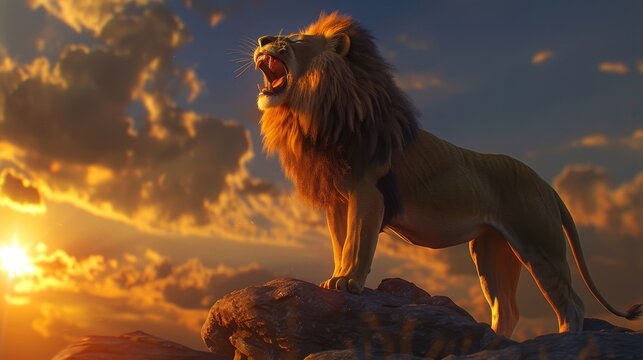

In [4]:
from PIL import Image
image = Image.open("/content/lion.jpg")
image

In [5]:
labels = ["a photo of a lion", "a photo of a sports"]

In [6]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)



In [7]:
outputs = model(**inputs)

In [8]:
outputs.logits_per_image

tensor([[24.3786, 16.7093]], grad_fn=<TBackward0>)

In [9]:
probs = outputs.logits_per_image.softmax(dim=1)[0]
probs

tensor([9.9953e-01, 4.6674e-04], grad_fn=<SelectBackward0>)

In [10]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a lion - probability of 0.9995
label: a photo of a sports - probability of 0.0005
